# Series de Taylor

## Introducción

El Teorema de Taylor y su fórmula, la serie de Taylor, son de gran valor en el estudio de los métodos numéricos. Permiten aproximar funciones complejas mediante polinomios, facilitando el análisis y la solución de problemas matemáticos.

## Definición

La serie de Taylor, también conocida como polinomio de Taylor, es una representación de una función en términos de una **suma infinita de términos**. Estos términos se derivan a partir de las derivadas de la función en un punto específico, $x_a$:

$$ T[f(x),x_a]=\sum_{i=0}^{\infty} \frac{f^{(i)}(x_a)}{i!}\, (x-x_a)^i $$

## Aplicación de Taylor

La serie de Taylor permite predecir el valor de una función en un punto en términos del valor de la función y sus derivadas en otro punto. Veamos cómo se construye esta aproximación:

1. **Aproximación de orden cero:**
   $$ f(x_{i+1}) \approx f(x_i) $$
   Esta es la aproximación más simple, asumiendo que el valor futuro es similar al valor anterior.

2. **Aproximación de primer orden:**
   $$ f(x_{i+1}) \approx f(x_i) + f'(x_i)(x_{i+1} -x_i) $$
   Incluye un término lineal para predecir un incremento o decremento de la función.

3. **Aproximación de segundo orden:**
   $$ f(x_{i+1}) \approx f(x_i) + f'(x_i)(x_{i+1} -x_i) + \frac{f''(x_i)}{2!}(x_{i+1} -x_i)^2 $$
   Incorpora un término cuadrático para representar la curvatura de la función.

Se pueden añadir más términos para mejorar la precisión de la aproximación.

## Solución Numérica y Aproximación

En la práctica, no se puede trabajar con series infinitas, por lo que se realiza una **aproximación utilizando $n$ términos**. Esta aproximación se conoce como la **serie de Taylor truncada**, $T_n$:

$$ T_n[f(x),x_a]=\sum_{i=0}^{n} \frac{f^{(i)}(x_a)}{i!}\, (x-x_a)^i $$

## Error de Truncamiento

El error de truncamiento surge debido a la **diferencia** entre la solución numérica obtenida con la serie de Taylor truncada y la solución exacta de la función.

### Residuo

El error de truncamiento se puede expresar como un residuo $R_n$:

$$ R_n = \int_{a}^{x} \frac{(x-t)^n}{n!}f^{(n+1)}(t)dt $$

Donde $t$ es una variable muda.

### Teorema del Valor Medio

Aplicando el segundo teorema del valor medio, el residuo se puede reescribir como:

$$ R_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_a)^{n+1} $$

Esta expresión también se conoce como la derivada del residuo.

## Representación Alternativa

Una forma común de representar la serie de Taylor es definiendo el incremento del paso $(x-x_a)$ como $h$:

$$ f(x) = f(x_a) + hf'(x_a) + \frac{h^2}{2!}f''(x_a) + \frac{h^3}{3!}f'''(x_a) + \cdots + \frac{h^n}{n!}f^{(n)}(x_a) + \frac{f^{(n+1)}(\xi)}{(n+1)!}h^{n+1} $$

## Ejemplo de Aproximación de Taylor

A continuación, muestro un ejemplo que aproxima la función seno ($sin(x)$) usando polinomios de Taylor de diferentes órdenes.

La serie de Taylor para sin(x) alrededor de x = 0 (que también es la serie de Maclaurin) se expresa como:

$$ \sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!} - \cdots $$

El término general de esta serie se puede escribir como:

$$ \frac{(-1)^n x^{2n+1}}{(2n+1)!} $$

Aquí es donde aparece el (-1)^n. Vamos a analizar por qué:

1. **Alternancia de signos:** Observa que los términos de la serie alternan entre positivo y negativo. El factor (-1)^n produce esta alternancia:
   - Cuando n = 0, (-1)^0 = 1
   - Cuando n = 1, (-1)^1 = -1
   - Cuando n = 2, (-1)^2 = 1
   - Y así sucesivamente...

2. **Derivadas del seno:** Esta alternancia se debe a cómo se comportan las derivadas del seno:
   - La primera derivada de sin(x) es cos(x)
   - La segunda derivada es -sin(x)
   - La tercera es -cos(x)
   - La cuarta es sin(x)
   - Este patrón se repite cada cuatro derivadas

3. **Evaluación en x = 0:** Cuando evaluamos estas derivadas en x = 0:
   - sin(0) = 0
   - cos(0) = 1
   - -sin(0) = 0
   - -cos(0) = -1
   - Y el ciclo se repite

4. **Términos no nulos:** Los únicos términos que no se anulan en x = 0 son los que corresponden a las derivadas impares (1ª, 3ª, 5ª, etc.), que son precisamente los que aparecen en la serie.

Por lo tanto, el (-1)^n en la fórmula:

$$ \frac{(-1)^n x^{2n+1}}{(2n+1)!} $$

asegura que los signos de los términos alternen correctamente, reflejando el comportamiento de las derivadas sucesivas del seno evaluadas en x = 0.





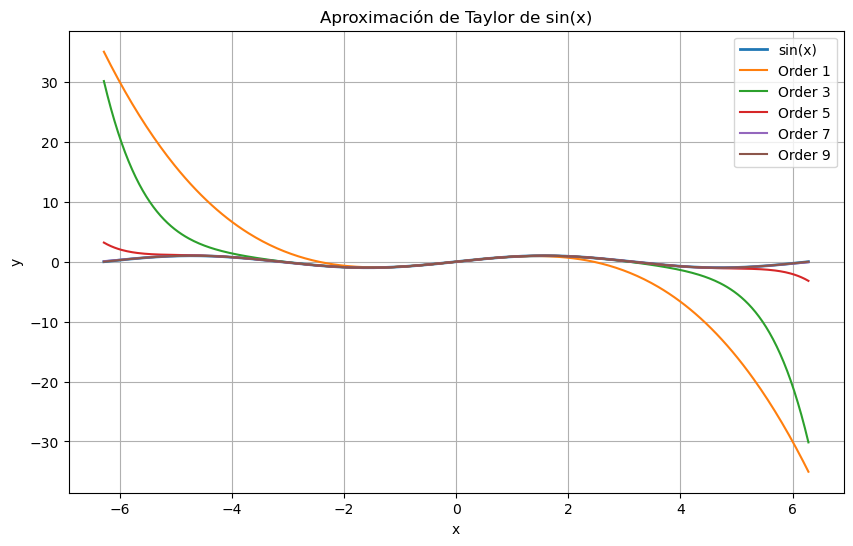

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Función para calcular el término n del polinomio de Taylor para sin(x)
def taylor_term(n, x):
    return ((-1)**n * x**(2*n + 1)) / math.factorial(2*n + 1)

# Función para aproximar sin(x) usando un polinomio de Taylor de orden 'order'
def taylor_approximation(order, x):
    return sum(taylor_term(n, x) for n in range(order + 1))

# Valores de x donde se evaluarán las funciones
x_values = np.linspace(-2*np.pi, 2*np.pi, 400)
y_values = np.sin(x_values)

# Gráfico de la función real sin(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='sin(x)', linewidth=2)

# Gráfico de las aproximaciones de Taylor de diferentes órdenes
for order in [1, 3, 5, 7, 9]:
    y_approx = [taylor_approximation(order, x) for x in x_values]
    plt.plot(x_values, y_approx, label=f'Order {order}')

# Configuración del gráfico
plt.title('Aproximación de Taylor de sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## Desarrollo de Taylor para Funciones Unidimensionales

- Una función es considerada analítica en $x=x_a$ si puede representarse mediante una serie de potencias en términos de $h = x-x_a$ dentro de un radio de convergencia.
- La condición para que una función sea analítica es que todas sus derivadas sean continuas.
- Un punto singular es aquel en el que $f(x)$ no es analítica (por ejemplo, $\tan(\pi/2)$).
- Si el valor de $x_a$ es 0, el polinomio se conoce como polinomio de Maclaurin.



## Ejercicio

A continuación, se presentan algunas actividades relacionadas con el polinomio de Taylor y la función seno:

1. Calcular el polinomio de Taylor de grado 5 que se ajusta a la función seno en el punto $\pi/2$.
2. Estimar el error que se comete al comparar el valor real de la función con un polinomio de Taylor de grado 2 y uno de grado 5.
3. Calcular el polinomio de Taylor de grado 6 para la función seno centrado en 0.
4. Graficar en Python la función seno y los polinomios de Taylor de grados 0, 1, 2, 3, 4, y 5 en torno a 0 y $\pi$ y centrado en $\pi/2$.
5. Analizar y discutir los resultados obtenidos en la gráfica.
